In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns 

from darts import TimeSeries 
from darts.utils.statistics import stationarity_test_adf, check_seasonality, extract_trend_and_seasonality

from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import acf, pacf

### **Project Objective**
Forecast hospital admissions 12 months ahead for the following hospitals: Alexandra hospital, Changi General hospital, Khoo Teck Puat hospital, Sengkang General hospital and National University hospital. 

You are to use data from 2020 Jan and onwards. 

In [12]:
df = pd.read_csv('/Users/kelvinfoo/Desktop/AI Masters/Hospital Admission Time Series/hospital_admission.csv')
df = df.rename(columns = {'Data Series':'Date', 'Public Sector Hospital Admissions -> Alexandra Hospital (Number)': 'Alexandra Hospital', 
                     'Public Sector Hospital Admissions -> Changi General Hospital (Number)':'Changi General Hospital', 
                     'Public Sector Hospital Admissions -> Khoo Teck Puat Hospital (Number)':'Khoo Teck Puat Hospital', 
                     'Public Sector Hospital Admissions -> National University Hospital (Number)': 'National University Hospital', 
                     'Public Sector Hospital Admissions -> Sengkang General Hospital (Number)': 'Sengkang General Hospital'})

df['Date'] = pd.to_datetime(df['Date'])
df.head()

/var/folders/sz/zbv9dh196hl72cfhwv8ygplh0000gn/T/ipykernel_2245/488166709.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Public Sector Hospital Admissions (Number),Alexandra Hospital,Changi General Hospital,Khoo Teck Puat Hospital,National University Hospital,Public Sector Hospital Admissions -> Ng Teng Fong General Hospital (Number),Sengkang General Hospital,Public Sector Hospital Admissions -> Singapore General Hospital (Number),Public Sector Hospital Admissions -> Woodlands Health Campus (Number),Public Sector Hospital Admissions -> Tan Tock Seng Hospital (Number),Public Sector Hospital Admissions -> Communicable Disease Centre (Number),Public Sector Hospital Admissions -> National Centre For Infectious Diseases (Number),Public Sector Hospital Admissions -> Institute Of Mental Health / Woodbridge Hospital (Number),Public Sector Hospital Admissions -> Kandang Kerbau Women's & Children's Hospital (Number),Public Sector Hospital Admissions -> National Heart Centre (Number)
0,2025-02-01,43835,992,4592,3515,5843,3488,4592,6035,2152,5194,na,186,803,5665,778
1,2025-01-01,45994,1046,5023,3575,6026,3712,4777,6413,2114,5415,na,191,824,6095,783
2,2024-12-01,46017,1009,4966,3616,6076,3660,4751,6643,2097,5392,na,233,761,5992,821
3,2024-11-01,44888,971,4665,3369,6209,3565,4467,6471,1931,5285,na,190,744,6271,750
4,2024-10-01,46552,952,4930,3511,6318,3776,4922,6798,1902,5238,na,139,839,6375,852


In [13]:
df = df[['Date', 'Alexandra Hospital', 'Changi General Hospital', 'Khoo Teck Puat Hospital', 'National University Hospital', 'Sengkang General Hospital']]
df = df[df['Date'] >= '2020-01-01']
print(f"Shape of data: {df.shape}")
df.head()

Shape of data: (62, 6)


,Date,Alexandra Hospital,Changi General Hospital,Khoo Teck Puat Hospital,National University Hospital,Sengkang General Hospital
0,2025-02-01,992,4592,3515,5843,4592
1,2025-01-01,1046,5023,3575,6026,4777
2,2024-12-01,1009,4966,3616,6076,4751
3,2024-11-01,971,4665,3369,6209,4467
4,2024-10-01,952,4930,3511,6318,4922


In [ ]:
df.isnull().sum() # No missing data 

Date                            0
Alexandra Hospital              0
Changi General Hospital         0
Khoo Teck Puat Hospital         0
National University Hospital    0
Sengkang General Hospital       0
dtype: int64

In [ ]:
df['Alexandra Hospital'] = df['Alexandra Hospital'].astype('int64')
df['Changi General Hospital'] = df['Changi General Hospital'].astype('int64')
df['Khoo Teck Puat Hospital'] = df['Khoo Teck Puat Hospital'].astype('int64')
df['National University Hospital'] = df['National University Hospital'].astype('int64')
df['Sengkang General Hospital'] = df['Sengkang General Hospital'].astype('int64')

df.set_index('Date', inplace = True)

### **Basic Exploratory Data Analysis**

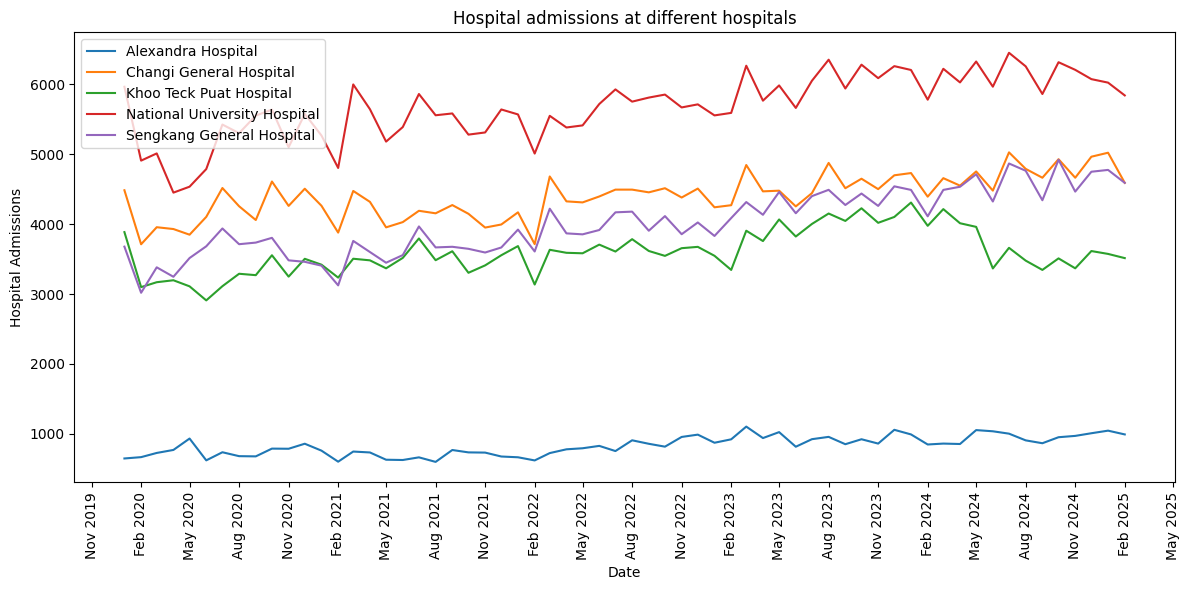

In [23]:
plt.figure(figsize = (12, 6))
for hospital in df.columns[1:]: 
    plt.plot(df['Date'], df[hospital], label = hospital)
plt.xlabel('Date')
plt.ylabel('Hospital Admissions')
plt.title('Hospital admissions at different hospitals')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) 
plt.xticks(rotation = 90)
plt.legend()
plt.tight_layout()
plt.show()

### **Exploratory Data Analysis for Time Series**

In [ ]:
# Check stationary using adf test 
for hospital in df.columns: 
    print(f"--- {hospital} ---")
    series = TimeSeries.from_series(df[hospital])
    adf_result = stationarity_test_adf(series)
    print(f"p-value: {round(adf_result[1], 3)}")

--- Alexandra Hospital ---
p-value: 0.913
--- Changi General Hospital ---
p-value: 0.991
--- Khoo Teck Puat Hospital ---
p-value: 0.34
--- National University Hospital ---
p-value: 0.353
--- Sengkang General Hospital ---
p-value: 0.996


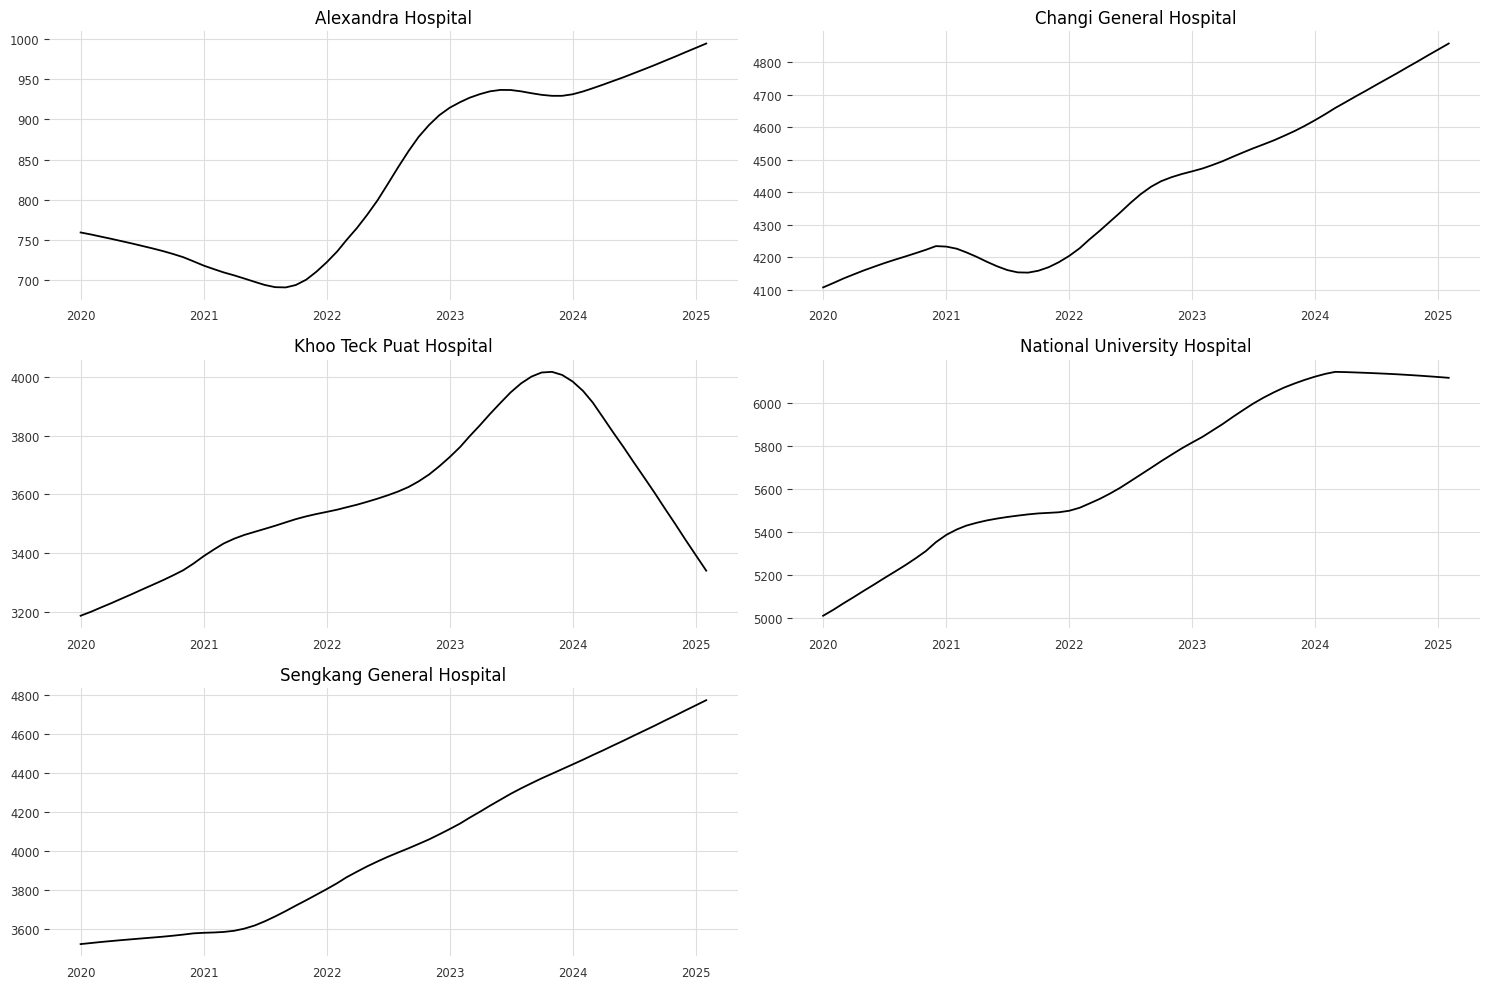

In [55]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

for i, hospital in enumerate(df.columns):
    series = df[hospital].dropna()
    
    stl = STL(series, period=12)
    result = stl.fit()
    trend = result.trend
    
    axes[i].plot(trend, label="Trend")
    axes[i].set_title(hospital)

if len(df.columns) < len(axes):
    for j in range(len(df.columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Check for seasonality 
for hospital in df.columns: 
    print(f"--- {hospital} ---")
    series = TimeSeries.from_series(df[hospital])
    print(check_seasonality(series))

--- Alexandra Hospital ---
(True, 5)
--- Changi General Hospital ---
(True, 3)
--- Khoo Teck Puat Hospital ---
(True, 2)
--- National University Hospital ---
(True, 9)
--- Sengkang General Hospital ---
(True, 7)


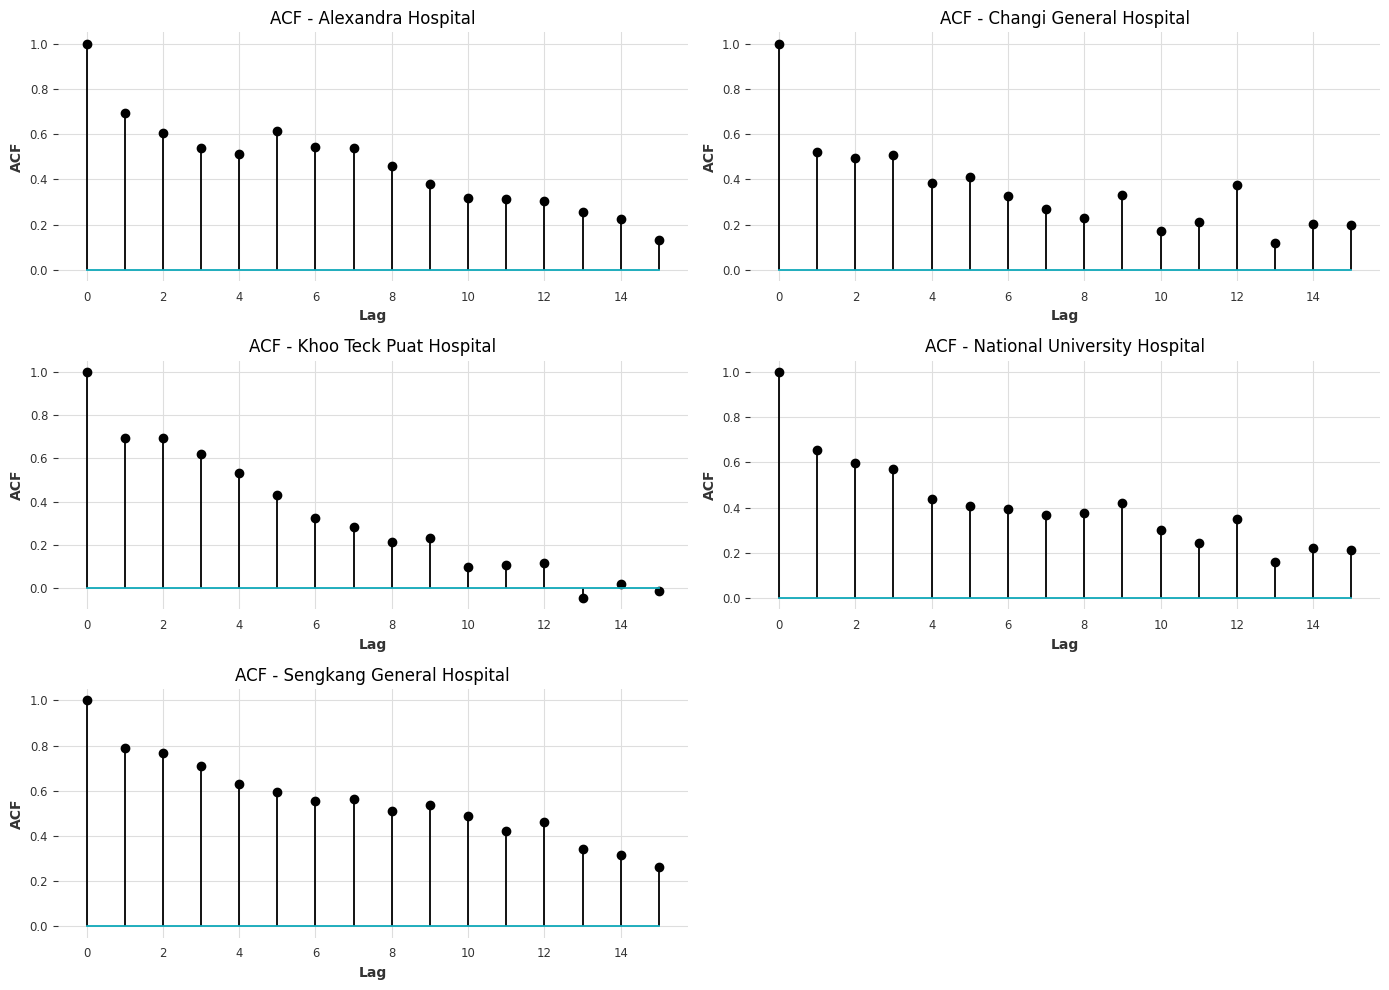

In [ ]:
# Plot acf 
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, hospital in enumerate(df.columns): 
    series = TimeSeries.from_series(df[hospital])
    values = series.values()
    
    acf_vals = acf(values, nlags=15)
    axes[i].stem(range(len(acf_vals)), acf_vals)
    axes[i].set_title(f"ACF - {hospital}")
    axes[i].set_xlabel("Lag")
    axes[i].set_ylabel("ACF")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

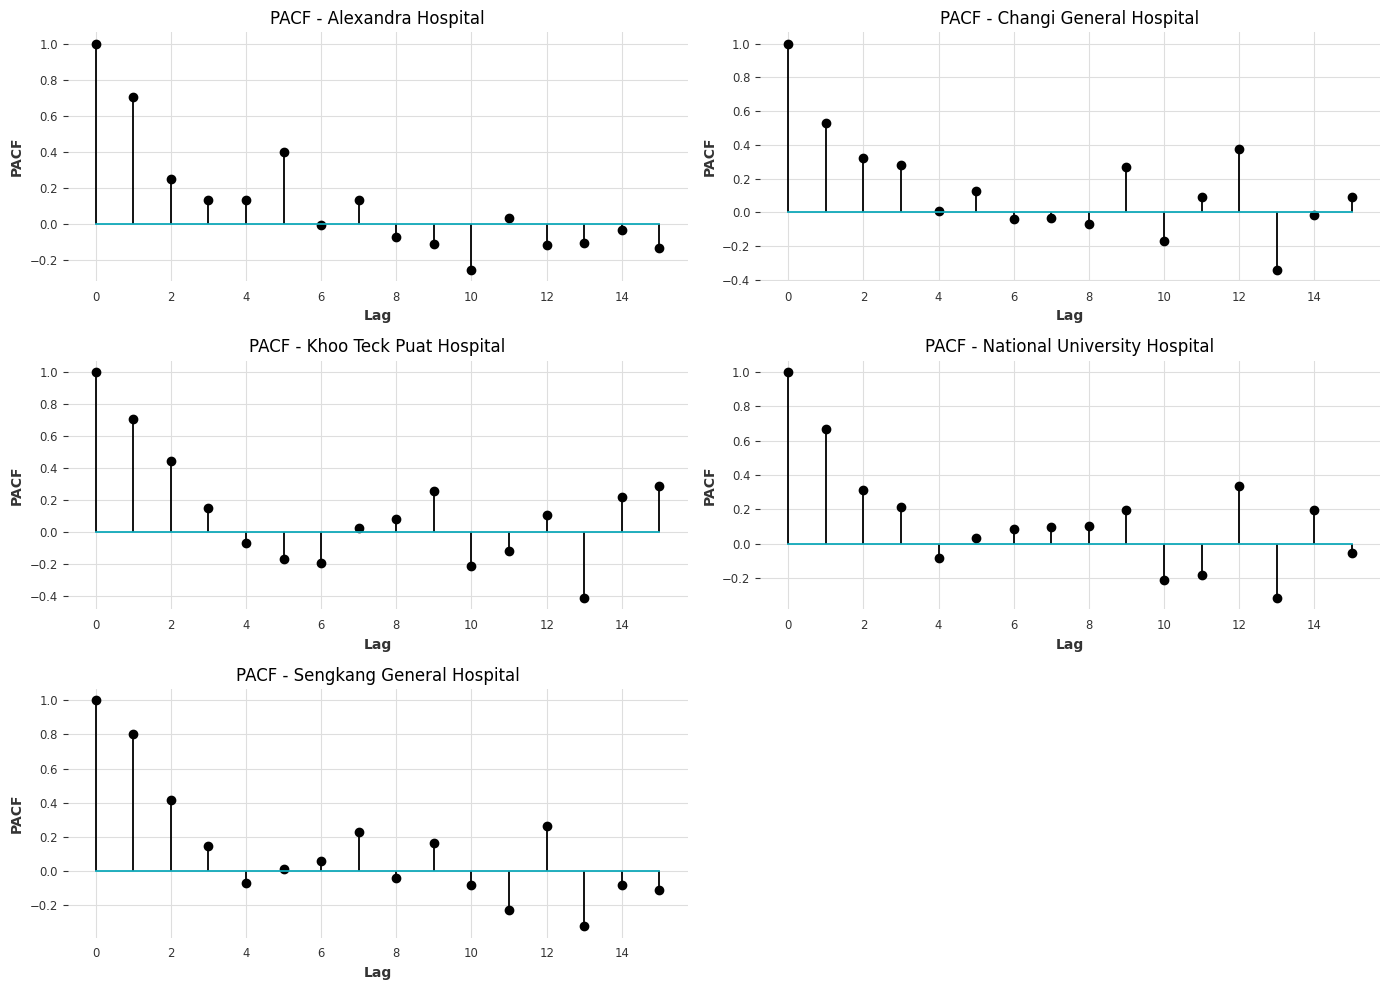

In [51]:
# Plot pacf 
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, hospital in enumerate(df.columns): 
    series = TimeSeries.from_series(df[hospital])
    values = series.values()
    
    acf_vals = pacf(values, nlags=15)
    axes[i].stem(range(len(acf_vals)), acf_vals)
    axes[i].set_title(f"PACF - {hospital}")
    axes[i].set_xlabel("Lag")
    axes[i].set_ylabel("PACF")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()